# Digital Sign and Image Management
###### Assignment 4

> **Cognome**: Davoli    **Nome**: Sofia                                  \\
> **Matricola**: 813479                                                     \\


## Libraries

In [67]:
import tensorflow as tf #-- TensorFlow

#-- Keras
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Input, Dropout, Flatten, BatchNormalization, MaxPooling2D, Conv2D, ReLU, Softmax
from keras.datasets import mnist
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

## File reading

loading minst and cifar10 dataset 


In [87]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape,
      x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [107]:
(x_train_cf, y_train_cf), (x_test_cf, y_test_cf) = keras.datasets.cifar10.load_data()
print(x_train_cf.shape,
      x_test_cf.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


# Preprocessing


Add new array dimension for the number of channels in image, only in minst dataset. The values are rescaled by normalizing the pixels.

In [89]:
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test,  axis = -1)


x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
x_train_cf = x_train_cf.astype('float32')/255.0
x_test_cf = x_test_cf.astype('float32')/255.0

print(x_train.shape, x_test.shape)
print(x_train_cf.shape,x_test_cf.shape)



(60000, 28, 28, 1) (10000, 28, 28, 1)
(50000, 32, 32, 3) (10000, 32, 32, 3)



Transform lables with to_categorical function which allows to perform a multinomial dummyzation. This functions tr this is needed as input for the NNet. Underneath is shown how the transformation work:
- before the value was simply 5
- after an arry with 10 classes indicates the value 5 by having all 0 values except for the 1 in the 5-th position (6-place)

In [42]:
y_train[0]

5

In [90]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_train_cf = to_categorical(y_train_cf, num_classes)
y_test_cf = to_categorical(y_test_cf, num_classes)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Model training and evaluation on MINST data

The batch size defines the number of samples that will be propagated through the network. 
In this case we have 60000 train examples and 10000 test examples for MINST dataset, and 50000 - 10000 for CIFAR10.

Chooosing small batch size advantages:
- It requires less memory. Since the network is trained using fewer samples, the overall training procedure requires less memory.
- Networks train faster with mini-batches. That's because weight are  updated  after each propagation. 

Chooosing small batch size disadvantages:
- The smaller the batch the less accurate the estimate of the gradient will be

The epochs are the number of time that the ENTIRE dataset is passed forward and backward through the neural network.

for example in we choose a batch size of 6000, to complete 1 epochs we will need to analyze 10 batches to complete 1 epochs of training (for MINST data)

In [50]:
batch_size = 128
epochs = 10


The neural network is composed by:


- Explicit input layer
- Convolution (2D) with 32 3×3 filters
- ReLU
- Max pooling (2D) with a 2×2 filter
- Flattening
- Fully-connected mapping to 128 dimensions
- ReLU
- Fully-connected mapping to the final problem size (activation='softmax')

In [51]:
model = keras.Sequential()
model.add(Input(shape = (x_train.shape[1], #-- 28
                         x_train.shape[2], #-- 28
                         1)))
model.add(Conv2D(32, (3, 3)))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes,
                activation='softmax'))

In [52]:
# Model loss and optimizer
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [53]:
# Model training
history_mnist = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 0,
          validation_data = (x_test,
                             y_test))

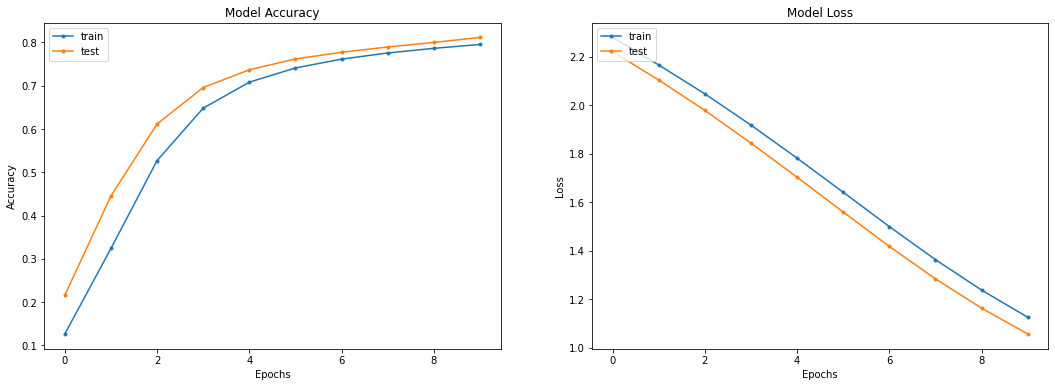

In [54]:
fig = plt.figure(figsize = (18, 6))

fig.add_subplot(1,2,1)
plt.plot(history_mnist.history['accuracy'], marker='.')
plt.plot(history_mnist.history['val_accuracy'], marker='.')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper left')

fig.add_subplot(1,2,2)
plt.plot(history_mnist.history['loss'], marker = '.')
plt.plot(history_mnist.history['val_loss'], marker = '.')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [55]:
# Evaluation
score = model.evaluate(x_test,
                       y_test,
                       verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0572863817214966
Test accuracy: 0.8115000128746033


In [56]:
print(classification_report(y_test.argmax(axis=1), 
                            model.predict(x_test).argmax(axis=1),
                            digits = 4))

              precision    recall  f1-score   support

           0     0.8648    0.9398    0.9007       980
           1     0.8794    0.9313    0.9046      1135
           2     0.8560    0.8236    0.8395      1032
           3     0.7016    0.8752    0.7789      1010
           4     0.7996    0.7719    0.7855       982
           5     0.9641    0.4518    0.6153       892
           6     0.8254    0.8685    0.8464       958
           7     0.8726    0.8531    0.8628      1028
           8     0.7140    0.7485    0.7308       974
           9     0.7444    0.7968    0.7697      1009

    accuracy                         0.8115     10000
   macro avg     0.8222    0.8061    0.8034     10000
weighted avg     0.8217    0.8115    0.8069     10000



# model with different batch size
The same model is now trained increasing number of batch size, and leaving the same number of epochs to see the effect of batch size on the net learning.

In [57]:

model = keras.Sequential()
model.add(Input(shape = (x_train.shape[1], #-- 28
                         x_train.shape[2], #-- 28
                         1)))
model.add(Conv2D(32, (3, 3)))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes,
                activation='softmax'))


model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [58]:
batch_size = 600
epochs = 10


model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 0,
          validation_data = (x_test,
                             y_test))

In [59]:
score = model.evaluate(x_test,
                       y_test,
                       verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.0754005908966064
Test accuracy: 0.6019999980926514


In [60]:
print(classification_report(y_test.argmax(axis=1), 
                            model.predict(x_test).argmax(axis=1),
                            digits = 4))

              precision    recall  f1-score   support

           0     0.5733    0.9571    0.7171       980
           1     0.8290    0.9568    0.8883      1135
           2     0.5171    0.8072    0.6303      1032
           3     0.7964    0.3990    0.5317      1010
           4     0.9183    0.1945    0.3210       982
           5     1.0000    0.0011    0.0022       892
           6     0.4526    0.7370    0.5608       958
           7     0.5623    0.8434    0.6747      1028
           8     0.7032    0.3624    0.4783       974
           9     0.5712    0.6363    0.6020      1009

    accuracy                         0.6020     10000
   macro avg     0.6923    0.5895    0.5406     10000
weighted avg     0.6907    0.6020    0.5520     10000



The results are worst than those obtained using only 128 examples per batch size. this is caused by the fact that the weights are updated less time than in the previous net.
To obtain better result, the same network with more epochs is trained. 

# model with more epochs

In [61]:
model = keras.Sequential()
model.add(Input(shape = (x_train.shape[1], #-- 28
                         x_train.shape[2], #-- 28
                         1)))
model.add(Conv2D(32, (3, 3)))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes,
                activation='softmax'))


model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [62]:
batch_size = 128
epochs = 50


model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 0,
          validation_data = (x_test,
                             y_test))

In [63]:
score = model.evaluate(x_test,
                       y_test,
                       verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.345415323972702
Test accuracy: 0.9067999720573425


In [64]:
print(classification_report(y_test.argmax(axis=1), 
                            model.predict(x_test).argmax(axis=1),
                            digits = 4))

              precision    recall  f1-score   support

           0     0.9342    0.9714    0.9525       980
           1     0.9567    0.9744    0.9655      1135
           2     0.9113    0.8566    0.8831      1032
           3     0.8938    0.9000    0.8969      1010
           4     0.9134    0.9236    0.9185       982
           5     0.8918    0.8318    0.8608       892
           6     0.9193    0.9395    0.9293       958
           7     0.9149    0.8891    0.9018      1028
           8     0.8527    0.8737    0.8631       974
           9     0.8708    0.8949    0.8827      1009

    accuracy                         0.9068     10000
   macro avg     0.9059    0.9055    0.9054     10000
weighted avg     0.9068    0.9068    0.9065     10000



Increasing number of epochs involves getting better result, form an accuracy of 0.8 (first model) to 0.9. 

# Model training and evaluation on CIFAR10 data

Model is now run on 10 epochs for dataset cifar.

In [96]:
model = keras.Sequential()
model.add(Input(shape = (x_train_cf.shape[1], #-- 32
                         x_train_cf.shape[2], #-- 32
                         3)))
model.add(Conv2D(32, (3, 3)))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes,
                activation='softmax'))


model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [97]:
batch_size = 128
epochs = 10


history_cifar = model.fit(x_train_cf, y_train_cf,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 0,
          validation_data = (x_test_cf,
                             y_test_cf))

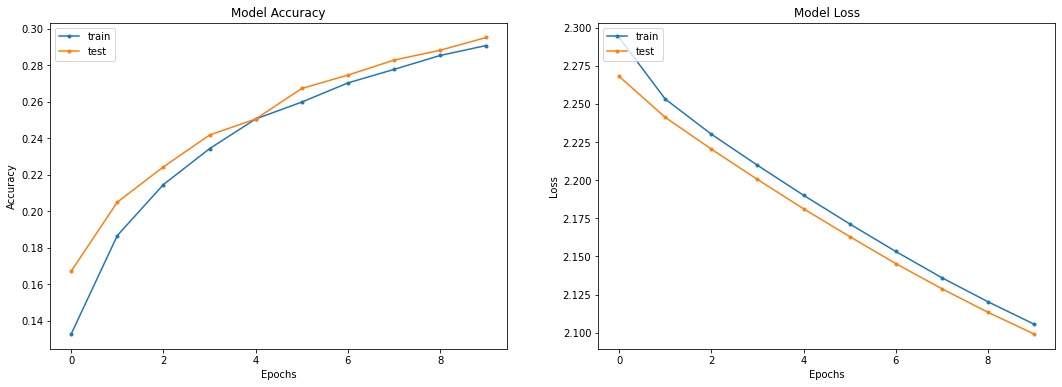

In [98]:
fig = plt.figure(figsize = (18,6))

fig.add_subplot(1,2,1)
plt.plot(history_cifar.history['accuracy'], marker = '.')
plt.plot(history_cifar.history['val_accuracy'], marker = '.')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper left')

fig.add_subplot(1,2,2)
plt.plot(history_cifar.history['loss'], marker = '.')
plt.plot(history_cifar.history['val_loss'], marker = '.')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [99]:
score = model.evaluate(x_test_cf,
                       y_test_cf,
                       verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.099208116531372
Test accuracy: 0.29510000348091125


In [100]:
print(classification_report(y_test_cf.argmax(axis=1), 
                            model.predict(x_test_cf).argmax(axis=1),
                            digits = 4))

              precision    recall  f1-score   support

           0     0.3537    0.5430    0.4284      1000
           1     0.3941    0.1860    0.2527      1000
           2     0.2216    0.1110    0.1479      1000
           3     0.1875    0.0720    0.1040      1000
           4     0.2823    0.1660    0.2091      1000
           5     0.2413    0.4280    0.3086      1000
           6     0.3535    0.3570    0.3552      1000
           7     0.2845    0.2040    0.2376      1000
           8     0.3065    0.4410    0.3616      1000
           9     0.2804    0.4430    0.3434      1000

    accuracy                         0.2951     10000
   macro avg     0.2905    0.2951    0.2749     10000
weighted avg     0.2905    0.2951    0.2749     10000



The Nerural Network model implemented is really effective to predict Minst dataset classes, but on Cifar 10 data doesn't work really well.
In fact with 10 epochs an accuracy of only 0.29 is reached on Cifar data instead the same model with same number of epochs reach an accuracy of 0.67 on Minst data.